##### Seminar: Introduction to Python Programming and Data analysis
##### Svetlana Sobolevskaia
##### Computing in the Humanities

## Introduction 
The goal of the research is to analyze the main trends in GDP per capita and human capital for European countries. This is quite useful for several reasons. GDP per capita shows average income and the general level of economic development of the countries. Analyzing GDP per capita shows the differences in living standards and access to resources. Human capital reveals the contribution of people to the economy. Human capital influences the rate of economic development of countries. 

This research will provide the important data to determine the most effective strategies in education, healthcare and labor market. 

For analyzing we will use the dataset containing the following data about each country: population in millions (annual average), number of persons engaged in millions (includes employees, self-employed, and contributing family members), average annual hours worked per engaged person, human capital index based on years of schooling and returns to education, output-side real GDP at current PPPs (in million 2017 USD), total factor productivity index at constant national prices (2017 = 1). This research will also use the metadata which helps to extract only European countries.


### Method

#### Importing and Combining Data

The analyze was conducted using python and the following libraries: pandas for working with dataframes, numpy for calculating and matplotlib and seaborn for plotting and linear regression.  
Firstly, the dataset and the metadata will be imported as two dataframes respectively: df_main for the main dataset and df_continents for the metadata.

In [1]:
#The cleaning of the data starts  here

#Import pandas for creating the dataframes and working with them
import pandas as pd

# Import csv files of the main dataset and its metadata and creating DataFrames in pandas
df_main = pd.read_csv("data/dataset_final_assignment.csv")          # contains country, year, GDP, population, HCI
df_continents = pd.read_csv("data/worlddata.csv")  # import csv file contains the names of countries and information about continents

# Inspect first rows in main
print(df_main.head())


  country        year  value series
0   Aruba  1950-01-01    NaN    pop
1   Aruba  1951-01-01    NaN    pop
2   Aruba  1952-01-01    NaN    pop
3   Aruba  1953-01-01    NaN    pop
4   Aruba  1954-01-01    NaN    pop


In [2]:
#Inspect first rows in metadata
print(df_continents.head())

    Country (en) Country (de)        Country (local) Country code Continent  \
0    Afghanistan  Afghanistan  Afganistan/Afqanestan           AF      Asia   
1          Egypt      Ägypten                   Misr           EG    Africa   
2  Åland Islands  Ålandinseln                  Åland           AX    Europe   
3        Albania     Albanien              Shqipëria           AL    Europe   
4        Algeria     Algerien     Al-Jaza’ir/Algérie           DZ    Africa   

   Capital  Population     Area  Coastline                Government form  \
0      NaN    33332025   652230          0  Presidential islamic republic   
1      NaN    94666993  1001450       2450          Presidential republic   
2      NaN       29013     1580          0   Autonomous region of Finland   
3      NaN     3038594    28748        362         parliamentary republic   
4      NaN    40263711  2381741        998          Presidential republic   

  Currency Currency code Dialing prefix  Birthrate  Deathrate 

After importing, the two dataframes were merged in one for the subsequent data cleaning. The columns "Country (en)", "Country (de)", "Country (local)", "Dialing prefix" were dropped right after merging because they are not necessary for the analysis. 

In [3]:
# Merge the information about countries and continents from two files in one DataFrame
df_merged = pd.merge(
    df_main,
    df_continents,
    how="left",
    left_on="country",        # column in df_main
    right_on="Country (en)"   # column in df_continents
)

#Drop unnecessary columns
df_merged = df_merged.drop(columns=["Country (en)", "Country (de)", "Country (local)", "Dialing prefix"])


#Check the result
print(df_merged.head())


  country        year  value series Country code      Continent  Capital  \
0   Aruba  1950-01-01    NaN    pop           AW  North America      NaN   
1   Aruba  1951-01-01    NaN    pop           AW  North America      NaN   
2   Aruba  1952-01-01    NaN    pop           AW  North America      NaN   
3   Aruba  1953-01-01    NaN    pop           AW  North America      NaN   
4   Aruba  1954-01-01    NaN    pop           AW  North America      NaN   

   Population   Area  Coastline  \
0    113648.0  180.0       69.0   
1    113648.0  180.0       69.0   
2    113648.0  180.0       69.0   
3    113648.0  180.0       69.0   
4    113648.0  180.0       69.0   

                                     Government form Currency Currency code  \
0  Parliamentary democracy (territory of the King...   Florin           AWG   
1  Parliamentary democracy (territory of the King...   Florin           AWG   
2  Parliamentary democracy (territory of the King...   Florin           AWG   
3  Parliamentary

As the dataframe is quite large, it is essential to first examine the available columns in order to gain an overview of the dataframe's structure. 

In [4]:
#Check what columns we have now in the dataframe using a list
print(df_merged.columns)

Index(['country', 'year', 'value', 'series', 'Country code', 'Continent',
       'Capital', 'Population', 'Area', 'Coastline', 'Government form',
       'Currency', 'Currency code', 'Birthrate', 'Deathrate',
       'Life expectancy', 'Url'],
      dtype='object')


Since the analysis focuses only on European countries, a subset containing only these observations was generated, and the 'Continent' column was removed.

Starting from this step and in subsequent stages, after each modification the contents and the current structure of the table were verified using the head() method.

In [5]:
# Create the subset for European countries only
df_europe = df_merged[df_merged["Continent"] == "Europe"].copy()

# Remove continent column (it is no longer useful since the analysis only focuses Europeean countries)
df_europe = df_europe.drop(columns=["Continent"])

# Check how the filtering works
print(df_europe["country"].nunique())
print(df_europe.head())

36
     country        year  value series Country code  Capital  Population  \
210  Albania  1950-01-01    NaN    pop           AL      NaN   3038594.0   
211  Albania  1951-01-01    NaN    pop           AL      NaN   3038594.0   
212  Albania  1952-01-01    NaN    pop           AL      NaN   3038594.0   
213  Albania  1953-01-01    NaN    pop           AL      NaN   3038594.0   
214  Albania  1954-01-01    NaN    pop           AL      NaN   3038594.0   

        Area  Coastline         Government form Currency Currency code  \
210  28748.0      362.0  parliamentary republic      Lek           ALL   
211  28748.0      362.0  parliamentary republic      Lek           ALL   
212  28748.0      362.0  parliamentary republic      Lek           ALL   
213  28748.0      362.0  parliamentary republic      Lek           ALL   
214  28748.0      362.0  parliamentary republic      Lek           ALL   

     Birthrate  Deathrate  Life expectancy  \
210       13.1        6.7             78.3   
211

#### Data cleaning

As an initial step in the data cleaning process, it is essential to assess the presence of missing values throughout the dataset. For this isna.sum() method was used.

In [6]:
# Clean the data
# Before handling the missing values, it is necessary to identify them
print(df_europe.isna().sum())    # Check how many Nan we have and where



country                0
year                   0
value               4206
series                 0
Country code           0
Capital            15120
Population             0
Area                   0
Coastline              0
Government form        0
Currency               0
Currency code          0
Birthrate              0
Deathrate              0
Life expectancy        0
Url                    0
dtype: int64


In [7]:
#Check the number of rows and columns in the dataframe
print(df_europe.shape) 

#Inspect the dataframe
print(df_europe.head())

(15120, 16)
     country        year  value series Country code  Capital  Population  \
210  Albania  1950-01-01    NaN    pop           AL      NaN   3038594.0   
211  Albania  1951-01-01    NaN    pop           AL      NaN   3038594.0   
212  Albania  1952-01-01    NaN    pop           AL      NaN   3038594.0   
213  Albania  1953-01-01    NaN    pop           AL      NaN   3038594.0   
214  Albania  1954-01-01    NaN    pop           AL      NaN   3038594.0   

        Area  Coastline         Government form Currency Currency code  \
210  28748.0      362.0  parliamentary republic      Lek           ALL   
211  28748.0      362.0  parliamentary republic      Lek           ALL   
212  28748.0      362.0  parliamentary republic      Lek           ALL   
213  28748.0      362.0  parliamentary republic      Lek           ALL   
214  28748.0      362.0  parliamentary republic      Lek           ALL   

     Birthrate  Deathrate  Life expectancy  \
210       13.1        6.7             78

The previous output revealed numerous missing values (NaN) in the value and Capital rows. Removing these rows was not feasible, as the dataset remained in long format, with variable names stored in the "series" column and their corresponding values in the "value" column. To facilitate further analysis, the dataframe was transformed into a pivot table, using country and year as identifiers and separating series and value into distinct columns.

In [8]:
# Pivot so that each series from the dataset (pop, emp, hc, cgdpo, etc.) becomes a separate column
df_wide = df_europe.pivot_table(
    index=["country", "year"],   # keep identifiers
    columns="series",            # move series into columns
    values="value"               # values fill the cells
).reset_index()

print(df_wide.head())

series  country        year  avh        cgdpo       emp        hc       pop  \
0       Albania  1970-01-01  NaN  6225.113281  0.769157  1.558792  2.150707   
1       Albania  1971-01-01  NaN  6456.324219  0.793121  1.586793  2.202189   
2       Albania  1972-01-01  NaN  6704.356445  0.817484  1.615296  2.254056   
3       Albania  1973-01-01  NaN  6939.364746  0.842242  1.644312  2.306290   
4       Albania  1974-01-01  NaN  7271.992676  0.867382  1.673849  2.358846   

series  rtfpna  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


The columns in the table were renamed to provide more descriptive labels. To gain the detailed description of the variables, Penn World Table User Guide: PWT 8.x User Guide was used.

In [9]:
#To rename the columns in order to provide the more descriptive labels

df_wide = df_wide.rename(columns={
    "pop": "Population_mln",
    "emp": "Employment_mln",
    "avh": "Avg_hours_worked",
    "hc": "Human_capital_index",
    "cgdpo": "GDP_mln_USD_2017PPP",
    "rtfpna": "TFP_index"
})

print(df_wide.head())

series  country        year  Avg_hours_worked  GDP_mln_USD_2017PPP  \
0       Albania  1970-01-01               NaN          6225.113281   
1       Albania  1971-01-01               NaN          6456.324219   
2       Albania  1972-01-01               NaN          6704.356445   
3       Albania  1973-01-01               NaN          6939.364746   
4       Albania  1974-01-01               NaN          7271.992676   

series  Employment_mln  Human_capital_index  Population_mln  TFP_index  
0             0.769157             1.558792        2.150707        NaN  
1             0.793121             1.586793        2.202189        NaN  
2             0.817484             1.615296        2.254056        NaN  
3             0.842242             1.644312        2.306290        NaN  
4             0.867382             1.673849        2.358846        NaN  


It was necessary to transform the missing values into values that could be used for further analysis. Dropping rows with NaN will result in the loss of valid data in the columns without NaN, therefore, all NaN values were replaced. This approach allows the use of valid cell values while ensuring that missing entries do not affect the results. 

Firstly, the columns containing missing or negative values (for numeric columns) were identified.

In [10]:
# Start the  strategy for replacing the missing values
# Check missing counts
print(df_wide.isna().sum())
# Select only numeric columns
numeric_cols = df_wide.select_dtypes(include=["number"]).columns

# Check negative values only for the numeric columns
print((df_wide[numeric_cols] < 0).sum())


series
country                  0
year                     0
Avg_hours_worked       398
GDP_mln_USD_2017PPP      0
Employment_mln           0
Human_capital_index     90
Population_mln           0
TFP_index              268
dtype: int64
series
Avg_hours_worked       0
GDP_mln_USD_2017PPP    0
Employment_mln         0
Human_capital_index    0
Population_mln         0
TFP_index              0
dtype: int64


Secondlt, the missing values in "Avg_hours_worked", "Human_capital_index" and "TFP_index" were replaced using the specific strategy.
Replacing them with 0 was inappropriate as this would inaccurately imply the complete absence of employment, education, and productivity. This is misleading. Thus, missing values in "Avg_hours_worked" and "Human_capital_index" were replaced with mean for these columns respectively and the missing values in "TFP_index" were replaced with 1 since this was the basic value for this column.

In [11]:
# Replace missing values with mean
df_wide["Avg_hours_worked"] = df_wide["Avg_hours_worked"].fillna(df_wide["Avg_hours_worked"].mean())
df_wide["Human_capital_index"] = df_wide["Human_capital_index"].fillna(df_wide["Human_capital_index"].mean())

#Replace missing values with 1 since 1 is the basic value for this column
df_wide["TFP_index"] = df_wide["TFP_index"].fillna(1)

print(df_wide.head())

series  country        year  Avg_hours_worked  GDP_mln_USD_2017PPP  \
0       Albania  1970-01-01       1826.181695          6225.113281   
1       Albania  1971-01-01       1826.181695          6456.324219   
2       Albania  1972-01-01       1826.181695          6704.356445   
3       Albania  1973-01-01       1826.181695          6939.364746   
4       Albania  1974-01-01       1826.181695          7271.992676   

series  Employment_mln  Human_capital_index  Population_mln  TFP_index  
0             0.769157             1.558792        2.150707        1.0  
1             0.793121             1.586793        2.202189        1.0  
2             0.817484             1.615296        2.254056        1.0  
3             0.842242             1.644312        2.306290        1.0  
4             0.867382             1.673849        2.358846        1.0  


#### Data Standardization, Feature Construction, and Dataset Structuring

The population variable was standardized. According to the variable definitions from the Penn World Table 8.x, population is reported in millions. To convert it to individual units, a copy of the dataset was created and the population values were multiplied by 1,000,000. The result was saved into a new column "Population". 
The original column "Population_mln" was dropped, and the new column "Population" was used instead. 
Similarly, GDP values, originally reported in millions of USD, were multiplied by 1,000,000 and stored in a new column GDP_USD, after which the original GDP column was removed.

In [12]:
# Make a copy for standardized values
df_europe_std = df_wide.copy()

# Convert population from millions to individuals
df_europe_std["Population"] = df_europe_std["Population_mln"] * 1_000_000

df_europe_std["GDP_USD"] = df_europe_std["GDP_mln_USD_2017PPP"] * 1_000_000

# Drop the old columns "Population_mln" and "GDP_mln_USD_2017PPP"
df_europe_std = df_europe_std.drop(columns=["Population_mln", "GDP_mln_USD_2017PPP"])

print(df_europe_std.head())

series  country        year  Avg_hours_worked  Employment_mln  \
0       Albania  1970-01-01       1826.181695        0.769157   
1       Albania  1971-01-01       1826.181695        0.793121   
2       Albania  1972-01-01       1826.181695        0.817484   
3       Albania  1973-01-01       1826.181695        0.842242   
4       Albania  1974-01-01       1826.181695        0.867382   

series  Human_capital_index  TFP_index  Population       GDP_USD  
0                  1.558792        1.0   2150707.0  6.225113e+09  
1                  1.586793        1.0   2202189.0  6.456324e+09  
2                  1.615296        1.0   2254056.0  6.704356e+09  
3                  1.644312        1.0   2306290.0  6.939365e+09  
4                  1.673849        1.0   2358846.0  7.271993e+09  


To calculate GDP per capita, GDP in USD must be divided by the population in individuals. Prior to this operation, the population data was inspected for missing values or zeros.

In [13]:
# Count missing population values
print("Missing population values:", df_europe_std["Population"].isna().sum())

# Count zero population values
print("Zero population values:", (df_europe_std["Population"] == 0).sum())

Missing population values: 0
Zero population values: 0


The output showed no zeros or missing values, therefore GDP was divided by population and the result stored in a new column gdp_per_capita.

In [14]:
# Calculate GDP per capita
df_europe_std["gdp_per_capita"] = (
    df_europe_std["GDP_USD"] / df_europe_std["Population"]
)

print(df_europe_std.head())

series  country        year  Avg_hours_worked  Employment_mln  \
0       Albania  1970-01-01       1826.181695        0.769157   
1       Albania  1971-01-01       1826.181695        0.793121   
2       Albania  1972-01-01       1826.181695        0.817484   
3       Albania  1973-01-01       1826.181695        0.842242   
4       Albania  1974-01-01       1826.181695        0.867382   

series  Human_capital_index  TFP_index  Population       GDP_USD  \
0                  1.558792        1.0   2150707.0  6.225113e+09   
1                  1.586793        1.0   2202189.0  6.456324e+09   
2                  1.615296        1.0   2254056.0  6.704356e+09   
3                  1.644312        1.0   2306290.0  6.939365e+09   
4                  1.673849        1.0   2358846.0  7.271993e+09   

series  gdp_per_capita  
0          2894.449723  
1          2931.775710  
2          2974.352210  
3          3008.886457  
4          3082.860295  


To compute the natural logarithm of GDP per capita and store the results in a new column log_gdp_per_capita, the data were first checked for zeros or negative values, as the logarithm is undefined for such entries.

In [15]:
print("How many non-positive gdp_per_capita values are there?", (df_europe_std["gdp_per_capita"] <= 0).sum())

How many non-positive gdp_per_capita values are there? 0


The output showed zero non-positive values, indicating that all the values in GDP per capita are positive. Therefore, the natural logarithm can be applied. The numpy library is used for this operation because of its computational efficiency compared to corresponding pandas method apply().

In [16]:
# Import numpy library for calculations
import numpy as np

# Calculate the natural logarithm of GDP per capita and store it in a specific column
df_europe_std["log_gdp_per_capita"] = np.log(df_europe_std["gdp_per_capita"])
# Check the result
print(df_europe_std[["country", "year", "gdp_per_capita", "log_gdp_per_capita"]].head())

series  country        year  gdp_per_capita  log_gdp_per_capita
0       Albania  1970-01-01     2894.449723            7.970550
1       Albania  1971-01-01     2931.775710            7.983364
2       Albania  1972-01-01     2974.352210            7.997782
3       Albania  1973-01-01     3008.886457            8.009325
4       Albania  1974-01-01     3082.860295            8.033613


Prior to dividing all European countries into regions, it is essential to identify which countries are represented in the dataset.  

In [17]:
# Divide European countries into regions

# Identify which countries were included in the dataset
countries = df_europe_std["country"].unique().tolist()
print(countries)

['Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']


A dictionary of countries and European sub-regions was created using the UN Geoscheme for Europe, and all countries were mapped to their respective sub-regions using the map() function. The function "assign_region" was created for mapping and the get() function was used inside it.

In [18]:
# Create a dictionary of countries from the dataset and subregions
# Subregions were identified according the UN Geoscheme for Europe

region_map = {
    # Northern Europe
    "Denmark": "Northern Europe",
    "Estonia": "Northern Europe",
    "Finland": "Northern Europe",
    "Iceland": "Northern Europe",
    "Ireland": "Northern Europe",
    "Latvia": "Northern Europe",
    "Lithuania": "Northern Europe",
    "Norway": "Northern Europe",
    "Sweden": "Northern Europe",
    "United Kingdom": "Northern Europe",

    # Western Europe
    "Austria": "Western Europe",
    "Belgium": "Western Europe",
    "France": "Western Europe",
    "Germany": "Western Europe",
    "Luxembourg": "Western Europe",
    "Netherlands": "Western Europe",
    "Switzerland": "Western Europe",

    # Southern Europe
    "Albania": "Southern Europe",
    "Bosnia and Herzegovina": "Southern Europe",
    "Bulgaria": "Southern Europe",
    "Croatia": "Southern Europe",
    "Greece": "Southern Europe",
    "Italy": "Southern Europe",
    "Malta": "Southern Europe",
    "Montenegro": "Southern Europe",
    "Portugal": "Southern Europe",
    "Serbia": "Southern Europe",
    "Slovenia": "Southern Europe",
    "Spain": "Southern Europe",

    # Eastern Europe
    "Belarus": "Eastern Europe",
    "Czech Republic": "Eastern Europe",
    "Hungary": "Eastern Europe",
    "Poland": "Eastern Europe",
    "Romania": "Eastern Europe",
    "Slovakia": "Eastern Europe",
    "Ukraine": "Eastern Europe",
}

# Mapping countries to sub-regions using a function
def assign_region(country):
    """The function tooks the country name as an input from the dictionary region_map which was identified above.
     If the country exists as a key in region_map, return its region.
     If the country is not found, return "Other". """
    return region_map.get(country, "Other")  # "Other" if a country is missing

# Copy dataframe and apply a mapping function
df_ready = df_europe_std.copy()
df_ready["region"] = df_ready["country"].map(assign_region)

# Check if all countries were assigned to a sub-region (without duplicates)
print(df_ready[["country", "region"]].drop_duplicates().sort_values("region"))



series                 country           region
120                    Belarus   Eastern Europe
1845                   Ukraine   Eastern Europe
1575                  Slovakia   Eastern Europe
330             Czech Republic   Eastern Europe
739                    Hungary   Eastern Europe
1365                    Poland   Eastern Europe
1485                   Romania   Eastern Europe
1875            United Kingdom  Northern Europe
1029                 Lithuania  Northern Europe
999                     Latvia  Northern Europe
859                    Ireland  Northern Europe
789                    Iceland  Northern Europe
460                    Finland  Northern Europe
1295                    Norway  Northern Europe
430                    Estonia  Northern Europe
360                    Denmark  Northern Europe
1705                    Sweden  Northern Europe
1545                    Serbia  Southern Europe
1605                  Slovenia  Southern Europe
1635                     Spain  Southern

Before creating two helper functions filter_by_year(df,  year) and filter_by_region(df,  region) to generate sub-dataframes for further analysis, it is necessary to check the type of the "year" column.

In [19]:
# Check the type of year column
print(df_ready['year'].head())

0    1970-01-01
1    1971-01-01
2    1972-01-01
3    1973-01-01
4    1974-01-01
Name: year, dtype: object


Since all dates are in a similar format (e.g., 1970-01-01), they were converted to integer type, and the day and month components were removed to simplify further analysis.

In [20]:
# Convert the data inside year column to datetime
df_ready["year"] = pd.to_datetime(df_ready["year"], errors='coerce')

# Extract the year as integer and save only year in the column "year"
df_ready["year"] = df_ready["year"].dt.year.astype(int)

# Check the result
print(df_ready["year"].head())
print(df_ready["year"].dtype)

0    1970
1    1971
2    1972
3    1973
4    1974
Name: year, dtype: int32
int32


Two helper functions"filter_by_year" and "filter_by_region" were created to filter the data by a specified year and region.

In [21]:
#Function which return a sub-dataframe filtered by a given year
def filter_by_year(df, year):
    """
    Return a sub-dataframe filtered by a given year.
    Assumes 'year' column contains integer years.
    """
    return df[df["year"] == year]

#Function which return a sub-dataframe filtered by a given region
def filter_by_region(df, region):
    """Return a sub-dataframe filtered by a given region."""
    return df[df["region"] == region]

#Check the output of functions

# Get only data for year 2015
df_2015 = filter_by_year(df_ready, 2015)
print(df_2015.head())

# Get only data for Western Europe
df_western = filter_by_region(df_ready, "Western Europe")
print(df_western.head())

series                 country  year  Avg_hours_worked  Employment_mln  \
45                     Albania  2015       1826.181695        0.926395   
115                    Austria  2015       1605.280548        4.278240   
145                    Belarus  2015       1826.181695        4.425303   
215                    Belgium  2015       1575.456869        4.622034   
245     Bosnia and Herzegovina  2015       1826.181695        0.616872   

series  Human_capital_index  TFP_index  Population       GDP_USD  \
45                 2.937533   1.000000   2890513.0  3.346554e+10   
115                3.337063   0.996383   8678660.0  4.285397e+11   
145                2.790262   1.000000   9439423.0  1.847746e+11   
215                3.123914   1.014365  11287940.0  4.822106e+11   
245                2.790262   1.000000   3429361.0  4.007443e+10   

series  gdp_per_capita  log_gdp_per_capita           region  
45        11577.714806            9.356837  Southern Europe  
115       49378.558297

The index was reset for the subsequent analysis. 

In [22]:
#Reset the index
df_ready = df_ready.reset_index(drop=True)

It was essential to reorder the columns as follows: country, year, region, continent, GDP, population, gdp_per_capita, log_gdp_per_capita, and HCI. 

Firstly, the existing columns were examined to determine the appropriate order.

In [23]:
#Check what columns are there in the dataset
print(df_ready.columns)

Index(['country', 'year', 'Avg_hours_worked', 'Employment_mln',
       'Human_capital_index', 'TFP_index', 'Population', 'GDP_USD',
       'gdp_per_capita', 'log_gdp_per_capita', 'region'],
      dtype='object', name='series')


To arrange the columns in the required order, "GDP_USD" was renamed to "GDP", "Population" to "population", and "Human_capital_index" to "HCI". The columns "Avg_hours_worked", "Employment_mln", and "TFP_index" were removed. The column "continent" was removed in previous steps, as the analysis is applied only to European countries.

In [24]:
# Rename the columns
df_ready = df_ready.rename(columns={
    "GDP_USD": "GDP",
    "Population": "population",
    "Human_capital_index": "HCI"
})

# Drop unnecessary columns
df_ready = df_ready.drop(columns=["Avg_hours_worked", "Employment_mln", "TFP_index"])

# Check the result
print(df_ready.head())


series  country  year       HCI  population           GDP  gdp_per_capita  \
0       Albania  1970  1.558792   2150707.0  6.225113e+09     2894.449723   
1       Albania  1971  1.586793   2202189.0  6.456324e+09     2931.775710   
2       Albania  1972  1.615296   2254056.0  6.704356e+09     2974.352210   
3       Albania  1973  1.644312   2306290.0  6.939365e+09     3008.886457   
4       Albania  1974  1.673849   2358846.0  7.271993e+09     3082.860295   

series  log_gdp_per_capita           region  
0                 7.970550  Southern Europe  
1                 7.983364  Southern Europe  
2                 7.997782  Southern Europe  
3                 8.009325  Southern Europe  
4                 8.033613  Southern Europe  


The columns were reordered using the following list: country, year, region, GDP, population, gdp_per_capita, log_gdp_per_capita, HCI.

In [25]:
# Reorder columns as required
df_ready = df_ready[[
    "country",
    "year",
    "region",
    "GDP",
    "population",
    "gdp_per_capita",
    "log_gdp_per_capita",
    "HCI"
]]

# Check the head of the dataframe
print(df_ready.head())

series  country  year           region           GDP  population  \
0       Albania  1970  Southern Europe  6.225113e+09   2150707.0   
1       Albania  1971  Southern Europe  6.456324e+09   2202189.0   
2       Albania  1972  Southern Europe  6.704356e+09   2254056.0   
3       Albania  1973  Southern Europe  6.939365e+09   2306290.0   
4       Albania  1974  Southern Europe  7.271993e+09   2358846.0   

series  gdp_per_capita  log_gdp_per_capita       HCI  
0          2894.449723            7.970550  1.558792  
1          2931.775710            7.983364  1.586793  
2          2974.352210            7.997782  1.615296  
3          3008.886457            8.009325  1.644312  
4          3082.860295            8.033613  1.673849  


### Analysis and Representation of Economic Development and Human Capital in Europe

#### Economic Indicators Across Countries and Regions

The DataFrame (df_ready) was prepared for descriptive and comparative analysis, which was focused on GDP per capita and human capital index both at the country and regional level. The relationship between HCI and economic development across European countries and regions was identified, producing both summary statistics and visualisations.

The function compute_average was created for computing the average GDP per capita for each country over all years. The function returns a dataframe with following columns: country, avg_gdp_per_capita.

In [26]:
def compute_average(df):
    """
    Compute average GDP per capita for each country over all years.
    Returns a DataFrame with columns: country, avg_gdp_per_capita
    """
    df_country_avg = df.groupby("country", as_index=False)["gdp_per_capita"].mean()
    df_country_avg = df_country_avg.rename(columns={"gdp_per_capita": "avg_gdp_per_capita"})
    return df_country_avg

In [27]:
# Check the function
df_country_avg = compute_average(df_ready)

# Check the result
print(df_country_avg.head())

                  country  avg_gdp_per_capita
0                 Albania         5711.463225
1                 Austria        25713.614476
2                 Belarus        14189.142489
3                 Belgium        24867.146067
4  Bosnia and Herzegovina         7414.516228


The function filter_by_threshold was created for identifying the countries which values in specified columns are above the specified threshold. By default the function filters by GDP per capita.

In [28]:
def filter_by_threshold(df, threshold, column="gdp_per_capita"):
    """
    Return a subset of the DataFrame where the specified column exceeds the threshold.
    
    Parameters:
    - df: pandas DataFrame
    - threshold: numeric threshold value
    - column: column name to filter by (by default is gdp_per_capita)
    
    Returns:
    - filtered DataFrame
    """
    return df[df[column] > threshold]

The function was tested using the specified dataframe, a defiden threshold value and filtering by specified column. The results confirmed that the function operates as expected.

In [29]:
# Filter countries with GDP per capita above 10,000
df_high_gdp = filter_by_threshold(df_ready, 10000)

# Filter by another column, e.g., Human Capital Index
df_high_hci = filter_by_threshold(df_ready, 0.8, column="HCI")

In [30]:
# Compute country averages
df_country_avg = compute_average(df_ready)
# Print the result
print(df_country_avg.head())

                  country  avg_gdp_per_capita
0                 Albania         5711.463225
1                 Austria        25713.614476
2                 Belarus        14189.142489
3                 Belgium        24867.146067
4  Bosnia and Herzegovina         7414.516228


The overall mean of GDP per capita across all European countries was calculated using mean() function.

In [31]:
# Compute overall mean of GDP per capita across all countries

overall_mean = df_country_avg["avg_gdp_per_capita"].mean()
print("Overall mean GDP per capita:", overall_mean)

Overall mean GDP per capita: 20766.41407414865


The dataframe was filtered to show the countries which GDP per capita is above the mean.

In [32]:
# Use the filter_by_threshold function
df_above_mean = filter_by_threshold(df_country_avg, overall_mean, column="avg_gdp_per_capita")

print(df_above_mean)

           country  avg_gdp_per_capita
1          Austria        25713.614476
3          Belgium        24867.146067
7   Czech Republic        26148.471993
8          Denmark        27882.316332
10         Finland        24231.821419
11          France        24731.673746
12         Germany        25974.230784
15         Iceland        28936.103505
16         Ireland        27533.433331
17           Italy        23126.079353
20      Luxembourg        38715.064460
23     Netherlands        29031.745356
24          Norway        36901.666070
30        Slovenia        25686.957303
32          Sweden        28040.027286
33     Switzerland        42048.754095
35  United Kingdom        24507.469231


#### Bar Chart of Country GDP per Capita

For visualising the comparing of gdp_per_capita for above-average countries was created a bar chart. For creating a bar chart was used matplotlib library and self-written plot_bar_gdp function.

In [33]:
import matplotlib.pyplot as plt

def plot_bar_gdp(df):
    """
    (Exercise 2. d)
    
    Create a bar chart comparing gdp_per_capita for countries in the given DataFrame.
    
    Parameters:
    - df: DataFrame with columns 'country' and 'avg_gdp_per_capita'
    """
    # Sort by GDP per capita for nicer visualization
    df_sorted = df.sort_values(by="avg_gdp_per_capita", ascending=False)
    
    # Create the bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted["country"], df_sorted["avg_gdp_per_capita"], color="skyblue")
    
    # Labels and title
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Average GDP per Capita (USD)")
    plt.xlabel("Country")
    plt.title("Countries with Above-Average GDP per Capita")
    plt.tight_layout()  # Adjust layout so labels fit
    plt.show()


For the readability on the bar chart bars are sorted from highest to lowest GDP per capita, the name of countries were rotated.

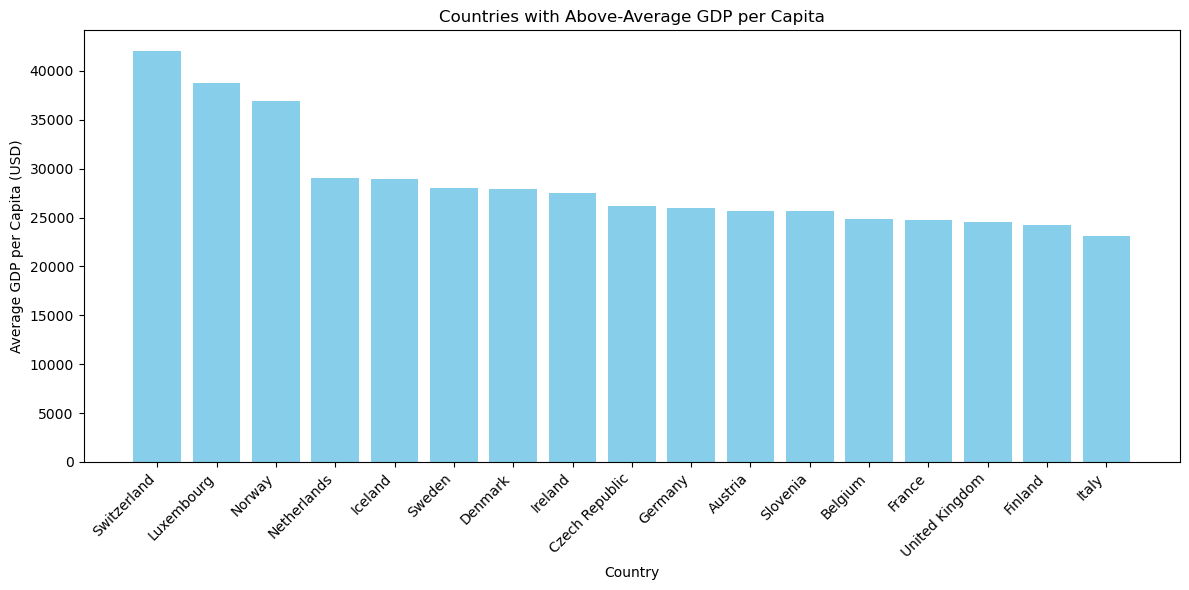

In [34]:
# Call the function for creating the bar chart
plot_bar_gdp(df_above_mean)

The bar chart shows the countries with above-average GDP per capita. This group included the countries from Nothern Europe and the richest countries from Western (as Switzerland, Luxembourgh, Netherlands, Germany, Ireland, Austria, France) and Southern Europe (as Slovenia and Italy). The group of top three performers consisted of countries such as Switzerland (above 40000 USD), Luxembourgh (about 38000 USD) and Norway (about 37000 USD), the other countries on the graph shows GDP per capita from 25000 to 28000 USD.

The data was grouped by region and year, then mean of gdp_per_capita was computed. The result was saved in dataframe df_region_avg.

In [35]:
# Group by region and year, then compute mean gdp_per_capita
df_region_avg = df_ready.groupby(["region", "year"], as_index=False)["gdp_per_capita"].mean()

# Check result
print(df_region_avg.head(10))

           region  year  gdp_per_capita
0  Eastern Europe  1960     1438.856710
1  Eastern Europe  1961     1579.597397
2  Eastern Europe  1962     1721.117739
3  Eastern Europe  1963     1846.875329
4  Eastern Europe  1964     1947.943383
5  Eastern Europe  1965     2134.920985
6  Eastern Europe  1966     2246.192182
7  Eastern Europe  1967     2491.134392
8  Eastern Europe  1968     2618.544972
9  Eastern Europe  1969     2765.180955


#### Average Values by Region and Trend Plot

The function plot_line_regional() was created to visualise GDP per capita trends by regions over time.

In [36]:
import matplotlib.pyplot as plt

# Exercise 2.1.e
# Visualising regional economic trends
def plot_line_regional(df):
    """
    (Exercise 2. e)
    Plot regional GDP per capita trends over time.
    
    Parameters:
    - df: DataFrame with columns 'region', 'year', 'gdp_per_capita'
    """
    plt.figure(figsize=(12, 6))
    
    # Plot one line per region
    for region in df["region"].unique():
        df_region = df[df["region"] == region]
        plt.plot(df_region["year"], df_region["gdp_per_capita"], marker="o", label=region)
    
    plt.xlabel("Year")
    plt.ylabel("Average GDP per Capita (USD)")
    plt.title("Regional GDP per Capita Trends in Europe")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


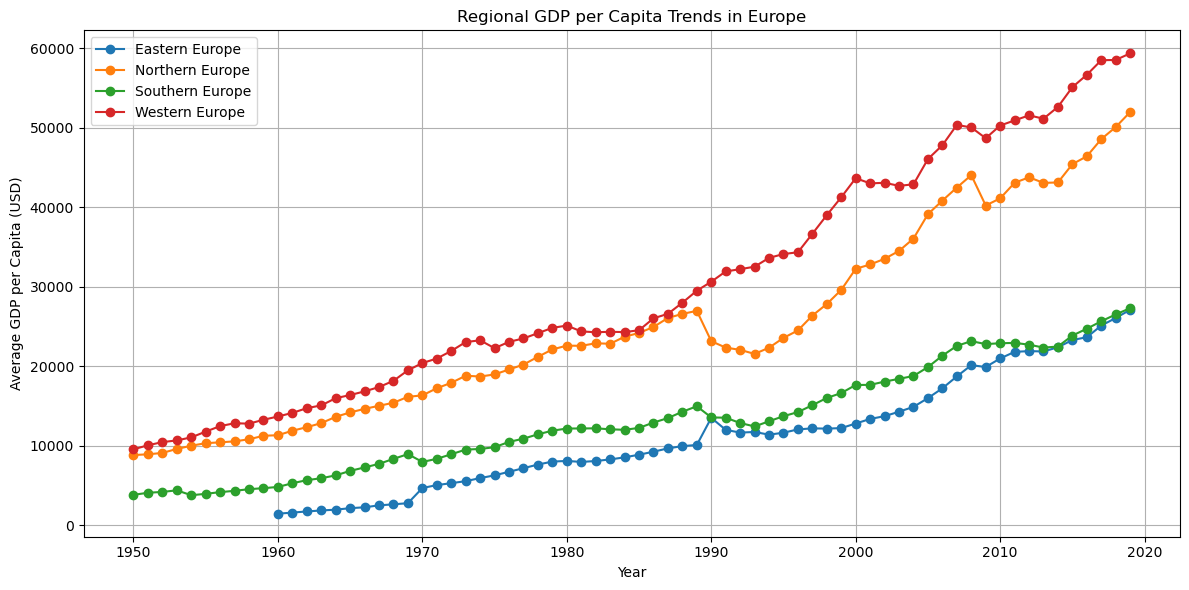

In [37]:
# Call the function to create the plot
plot_line_regional(df_region_avg)

The resulting line graph shows the difference in GDP per capita across European regions over the period from 1950 to 2019. The graph indicates that GDP per capita increased in all 4 regions throughout the period. Western Europe consistently leads in GDP per capita over the period, followed by Northern Europe, with minor differencies between these 2 regions in period from 1950 to 1990. In both regions, GDP per capita grew steadily, from approximately 10000 USD in 1950 to around 60000 USD in Western Europe and about 51000 USD in Northern Europe by 2019. A noticeable decline in GDP per capita occured in Northern Europe in period from 1990 to 2000, after that the growth resumed.

GDP per capita in Southern Europe and Eastern Europe also increased over the period, however in small absolute values. In Southern Europe GDP per capits increased from around 4000 USD in 1950 to roughly 29000 USD in 2019, while in Eastern Europe the GDP per capita increased from around 2000 USD in 1960 to approximately 29000 USD in 2019. According to the graph, the data in GDP per capita for Eastern Europe from 1950 to 1960 is not represented in the dataset.

### Comparing Differences in Human Capital Between and Within Regions

The mean and standard deviation of HCI was computed for each region and a selected year. The selected year from this step and further is consistently 2015. 


In [38]:
selected_year = 2015

#Filter dataframe by selected year
df_year = df_ready[df_ready["year"] == selected_year]

In [39]:
#Group by region and calculate mean & standard deviation of HCI
df_region_hci_stats = df_year.groupby("region")["HCI"].agg(
    mean_HCI="mean",
    std_HCI="std"
).reset_index()

In [40]:
#Check the result
print(df_region_hci_stats)

            region  mean_HCI   std_HCI
0   Eastern Europe  3.334790  0.313958
1  Northern Europe  3.391067  0.227148
2  Southern Europe  3.038591  0.294740
3   Western Europe  3.386132  0.219428


#### Identify Extremes

For each region, the countries with the minimum and maximum Human Capital Index (HCI) were determined for the year 2015.

In [41]:
# Define a selected year, the same with previous task for consistency
selected_year = 2015

# Filter the dataframe by this year
df_year = df_ready[df_ready["year"] == selected_year]

In [42]:
# Country with lowest HCI per region
idx_min = df_year.groupby("region")["HCI"].idxmin()
df_min_hci = df_year.loc[idx_min, ["region", "country", "HCI"]]

# Country with highest HCI per region
idx_max = df_year.groupby("region")["HCI"].idxmax()
df_max_hci = df_year.loc[idx_max, ["region", "country", "HCI"]]

In [43]:
print("Lowest HCI per region:")
print(df_min_hci)

print("\nHighest HCI per region:")
print(df_max_hci)

Lowest HCI per region:
series           region   country       HCI
145      Eastern Europe   Belarus  2.790262
1024    Northern Europe    Latvia  3.098449
1480    Southern Europe  Portugal  2.444253
215      Western Europe   Belgium  3.123914

Highest HCI per region:
series           region         country       HCI
1600     Eastern Europe        Slovakia  3.740158
1940    Northern Europe  United Kingdom  3.742114
1630    Southern Europe        Slovenia  3.490599
1840     Western Europe     Switzerland  3.672388


#### Selected summary dataframe

A summary DataFrame "df_hci_summary" with columns: region, mean, std, country_min_hci, country_max_hci was filtered for each region and selected year 2015. 

In [44]:
# Define a year and filter the dataframe by this year
selected_year = 2015
df_year = df_ready[df_ready["year"] == selected_year]

In [45]:
# Computing the mean and standard HCI per region and reset index

df_stats = df_year.groupby("region")["HCI"].agg(
    mean_HCI="mean",
    std_HCI="std"
).reset_index()


In [46]:
# Identify the country with min and max HCI

# Min HCI country
idx_min = df_year.groupby("region")["HCI"].idxmin()
df_min = df_year.loc[idx_min, ["region", "country"]].rename(columns={"country": "country_min_hci"})

# Max HCI country
idx_max = df_year.groupby("region")["HCI"].idxmax()
df_max = df_year.loc[idx_max, ["region", "country"]].rename(columns={"country": "country_max_hci"})

In [47]:
# Merge the results into a single dataframe
df_hci_summary = df_stats.merge(df_min, on="region").merge(df_max, on="region")

#Check the result
print(df_hci_summary)

            region  mean_HCI   std_HCI country_min_hci country_max_hci
0   Eastern Europe  3.334790  0.313958         Belarus        Slovakia
1  Northern Europe  3.391067  0.227148          Latvia  United Kingdom
2  Southern Europe  3.038591  0.294740        Portugal        Slovenia
3   Western Europe  3.386132  0.219428         Belgium     Switzerland


#### Boxplot of Human Capital Index by Region

The dataframe df_ready was utilized to construct a boxplot of the Human Capital Index (HCI) for the year 2015, grouped by region. 

A function plot_hci_boxplot(df, year) was implemented using filter_by_year(df, year) helper function to extract data corresponding to the year 2015. 

Finally, a Seaborn boxplot was generated to illustrate the distribution of HCI values across the different regions. 

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_hci_boxplot(df, year):
    """
    Create a boxplot of HCI for a specified year, grouped by region.

    Parameters:
    - df: pandas DataFrame containing columns 'region', 'year', 'HCI'
    - year: integer, the year to filter by
    """
    # Filter for the selected year using your helper function
    df_year = filter_by_year(df, year)
    
    # Set figure size
    plt.figure(figsize=(12, 6))
    
    # Create the boxplot (hue=None to avoid future warning)
    sns.boxplot(x="region", y="HCI", data=df_year, hue=None, palette="Set2")
    
    # Labels and title
    plt.xlabel("Region", fontsize=12)
    plt.ylabel("Human Capital Index (HCI)", fontsize=12)
    plt.title(f"HCI Distribution by Region in {year}", fontsize=14)
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha="right")
    
    plt.tight_layout()  # Adjust layout so labels fit
    plt.show()


C:\Users\siwei\AppData\Local\Temp\ipykernel_23384\368042563.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="region", y="HCI", data=df_year, hue=None, palette="Set2")


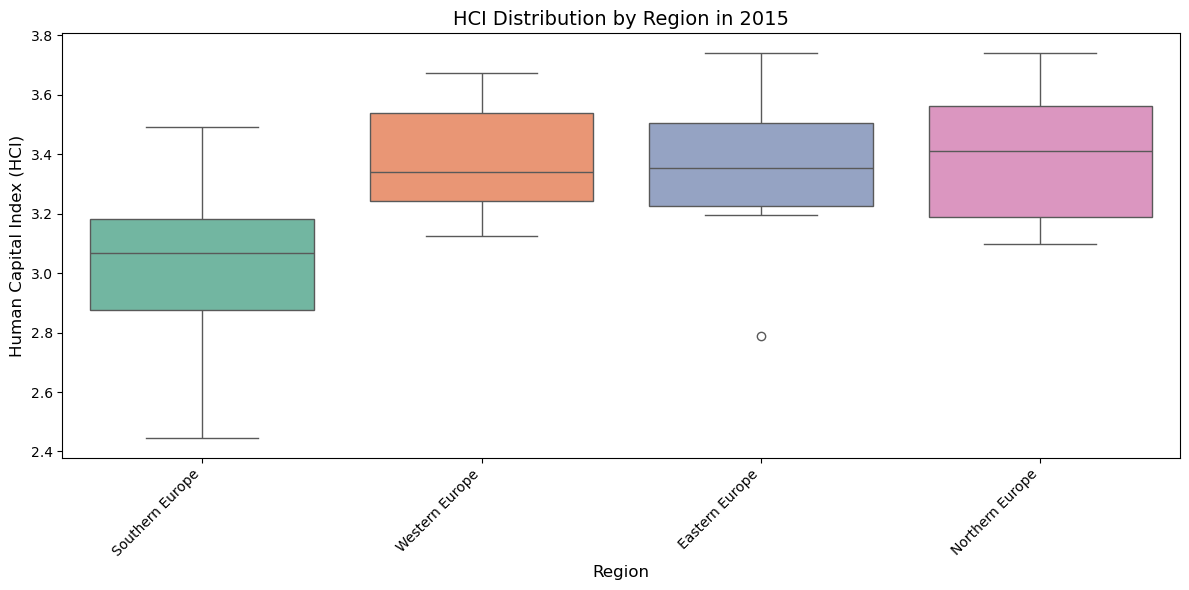

In [49]:
# Plot HCI boxplot for 2015
plot_hci_boxplot(df_ready, 2015)


The generated boxplot illustrates HCI distribution by European regions in 2015. X-axis shows European regions, y-axis shows HCI values, ranging from around 2.4 to 3.8. The boxplot shows clear regional disparities.
Southern Europe has the lowest median around 3.05 with interquanrtile range (IQR) spanned from roughly 2.85 to 3.2, the distribution is slightly skewed towards lower values.
Northern Europe shows the highest and most consistent HCI with median slightly above 3.4 and IQR spanned from 3.2 to 3.57 with few low outliers.
Western and Eastern Europe show similar average HCI around 3.35, though Eastern Europe displays relatively wide spread with one country significantly below the rest.

#### Examining the Link Between Human Capital and Economic Development

For the year 2015 a scatter plot was generated  demonstrating the relationship between human capital index (HCI) and natural logarithm of GDP per capita with each point representing an individual country. The visualization was constructed using the function plot_hci_vs_log_gdp_enhanced.

To clarify the regional patterns, the scatter plot was enhanced with regression lines for each region, with each line colour-coded according to its respective region. allowing for a clearer understanding of the relationship between HCI and log GDP per capita.

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_hci_vs_log_gdp_enhanced(df, year, show_labels=False):
    """
    Enhanced scatter plot of HCI vs log GDP per capita for a selected year.
    Points are colored and shaped by region, with optional country labels.
    Regression lines are added per region.

    Parameters:
    - df: pandas DataFrame with columns 'country', 'region', 'year', 'HCI', 'log_gdp_per_capita'
    - year: int, year to filter by
    - show_labels: bool, if True, adds country labels to points
    """
    # Filter for the selected year
    df_year = df[df["year"] == year]

    # Set style
    sns.set(style="whitegrid")

    # Define marker shapes for regions
    region_markers = {
        "Northern Europe": "o",
        "Southern Europe": "s",
        "Eastern Europe": "D",
        "Western Europe": "^"
    }

    # Plot regression lines with scatter points per region, suppress automatic legend from lmplot
    lm = sns.lmplot(
        data=df_year,
        x="HCI",
        y="log_gdp_per_capita",
        hue="region",              
        markers=[region_markers[r] for r in df_year["region"].unique()],
        palette="Set2",
        ci=None,                    
        height=6,
        aspect=1.5,
        scatter_kws={"s": 80, "alpha": 0.7},
        legend=False  # suppress lmplot's automatic legend
    )

    # Add custom legend manually
    plt.legend(title="Region")

    # Add country labels
    if show_labels:
        ax = lm.ax  # access the underlying axes
        for _, row in df_year.iterrows():
            ax.text(row["HCI"], row["log_gdp_per_capita"], row["country"],
                    fontsize=8, alpha=0.8)

    # Titles and labels
    lm.set_axis_labels("Human Capital Index (HCI)", "Log GDP per Capita")
    plt.title(f"HCI vs Log GDP per Capita by Region in {year}", fontsize=14)
    plt.tight_layout()
    plt.show()




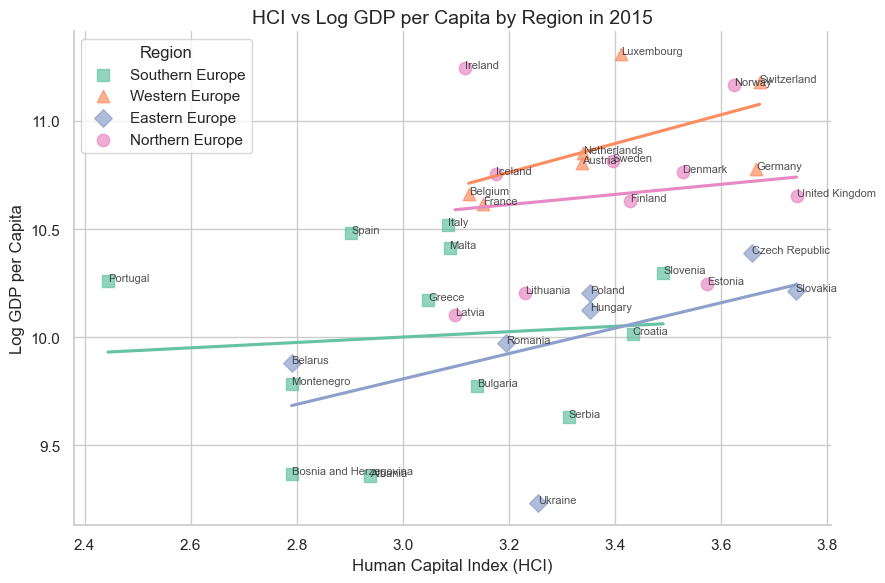

In [51]:
# Plot with country labels
plot_hci_vs_log_gdp_enhanced(df_ready, 2015, show_labels=True)



The Human Capital Index (HCI) and GDP per capita in 2015 show distinct regional trends among European nations. While Southern and Eastern European nations often have lower GDP per capita for equivalent HCI values, Northern and Western European nations typically attain higher GDP per capita at comparable HCI levels. Outliers with very high GDP per capita include Luxembourg, Norway, Switzerland, and Ireland. Although the intensity of this relationship varies by region, higher HCI is generally linked to higher GDP per capita across all countries.

### Key findings and trends

#### 1. GDP per capita patterns

Northern European countries and the wealthiest countries in Western and Southern Europa (e.g., Switzerland, Luxembourg, Norway, Italy) have above-average GDP per capita, with the top three exceeding $37,000. All European regions experienced growth in the period between 1950 and 2019. Western European countries were on the top, followed by Northern European countries. According to general GDP per capita pattern, the countries in Southern and Eastern Europe grew steadily but their GDP per capita was lower than in Western and Northern Europe. In addition, the missing data was discovered for the period 1950-1960 for Eastern Europe.

#### 2. Human Capital Index (HCI) Distribution (2015)

For the randomly selected year 2015, the highest and most consistent HCI was discovered in Northern Europe. The lowest median was in Southern Europe, also there were shown slightly skewed lower values. 

Western and Eastern Europe have similar average HCI. However, Eastern Europe displays greater variability. Overall, clear regional differences in human capital persist.

#### 3. Relationship Between HCI and GDP per Capita

Higher HCI generally corresponds to higher GDP per capita, though the strength of this relationship varies by region. Northern and Western European countries achieve higher GDP for similar HCI levels compared to Southern and Eastern Europe. Outliers with exceptionally high GDP, like Luxembourg and Norway, stand apart from the general trend.

### Limitations

During the analysis was discovered, that some data are missing, notably GDP per capita for Eastern Europe before 1960. Differences in national accounting and economic structures may affect cross-country comparisons. High-GDP outliers can distort regional averages and comparisons.

### Declaration about using of AI tools

During the preparation of this work, the author used ChatGPT to help with reformulating the text in more academic style. 

After using ChatGPT, the author reviewed and edited the content as needed and take full responsibility for the published content.